# Internship Task - Decision Tree Algorithm

### Problem Statment :- Create the Decision Tree Classifier and visualize it graphically.
 The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.  

## Loading Dataset

In [1]:
# Importing libraries in Python
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree


In [2]:
# Loading the iris dataset
iris=load_iris()

## Exploratory Data Analysis

In [3]:
X = iris.data
y=iris.target

In [4]:
# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=['Sepal length','Sepal width','Petal length','Petal width'])
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
print('Dataset Shape:', df.shape)

Dataset Shape: (150, 5)


In [7]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


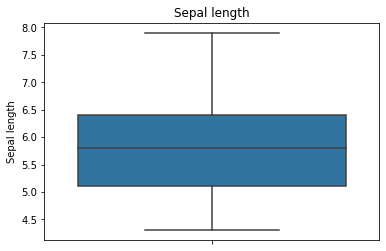

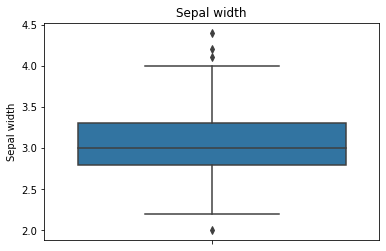

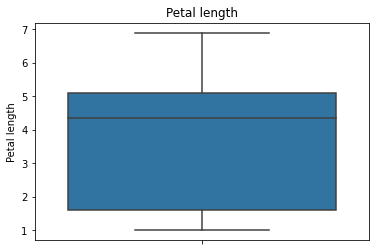

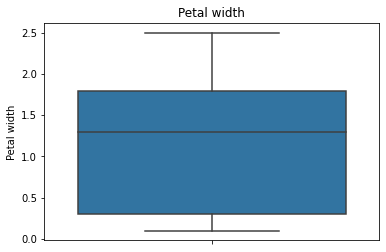

In [9]:
# Checking Outliers
import matplotlib.pyplot as plt 
import seaborn as sns

outlier_data=['Sepal length','Sepal width','Petal length','Petal width']

for i in outlier_data:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

As from the above Sepal Width has very few outliers,hence it is not necessary or relevant to treat those outliers as it can change the overall values of our analysis.

## Data Visualization

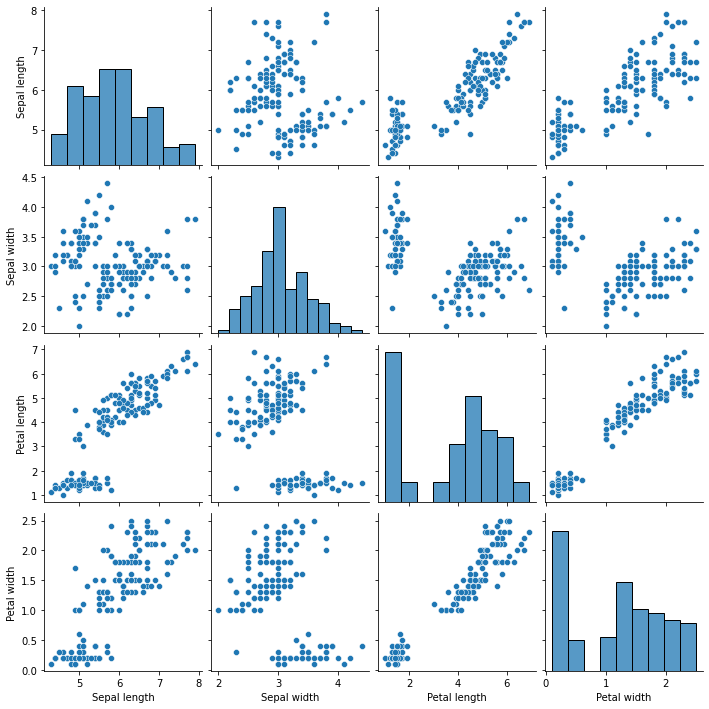

In [11]:
# Visualizing the Dataset

sns.pairplot(df)
plt.show()

## Decision Tree Making

In [12]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

print('Decision Tree Clasifier Created.')

y_pred = tree_classifier.predict(X_test)

Decision Tree Clasifier Created.


In [13]:
# Comparing the actual and predicted flower classification
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


## Visualizing the Trained Model

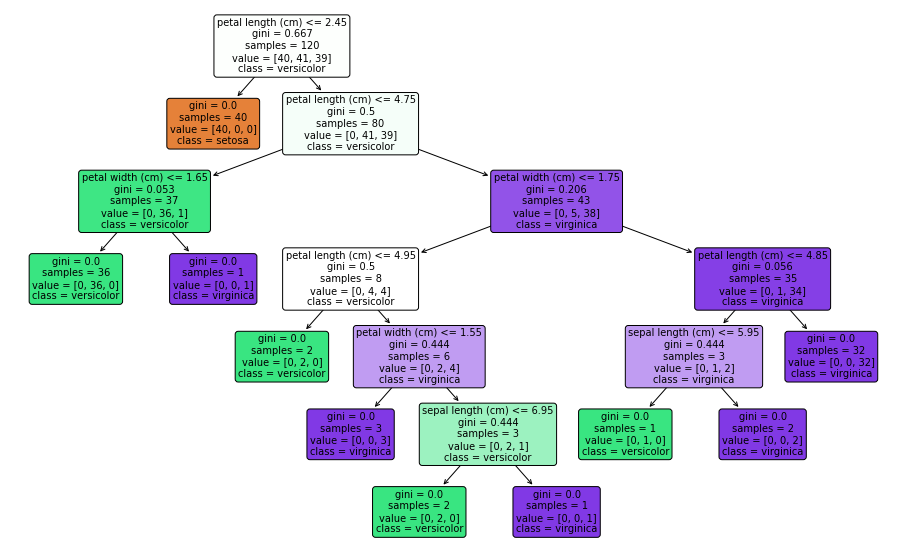

In [14]:
# Visualizing the trained Decision Tree Classifier Model. 
from sklearn.tree import plot_tree


plt.figure(figsize=(16,10))
plot_tree(tree_classifier, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True, 
          filled=True,
         )
plt.savefig('iris.decision_tree.pdf')
plt.show()


## Predicting the Species for random values of the given features.

In [41]:
print('Class Names = ',iris.target_names)
print()

# Now that we have a trained Decision Tree, we can use it to make predictions on new data.
new_data = np.array([[6.4, 3.5, 6.1, 2.5]])
predicted_class = tree_classifier.predict(new_data)
print('Que:- Estimating Class/ Species Probabilities for flower whose sepal length and sepal widht as 6.4cm and 3.5cm resp and petal length and petal width as 6.1cm and 2.5cm resp.')
print()
print('Predicted Iris Species is:' ,iris.target_names[predicted_class][0])

Class Names =  ['setosa' 'versicolor' 'virginica']

Que:- Estimating Class/ Species Probabilities for flower whose sepal length and sepal widht as 6.4cm and 3.5cm resp and petal length and petal width as 6.1cm and 2.5cm resp.

Predicted Iris Species is: virginica


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# Model Accuracy
import sklearn.metrics as sm


print('Accuracy:' ,sm.accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 100.0 %


The Accuracy of the model is 100% since all the features are taken into consideration.

#### The Predicition of Iris Species using Decision Tree Algorithm was carried out successfully and the Accuracy of the Model was also evaluated.

## Thank You !